# Bag Of Words (BoW) Model from Scratch with step-by-step explanation

**Core Idea: Count the Number of times each word appears in a document**

In [1]:
import numpy as np
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

# Step 1 - Sample Corpus & Preprocessing (Tokenization and Vocab Creation)

In [3]:
# Large corpus for testing BoW:
corpus = [
    "Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language.",
    "The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.",
    "Applications of NLP include language translation, sentiment analysis, speech recognition, and chatbot systems.",
    "Machine learning and deep learning techniques are commonly used in NLP to model and solve complex language tasks.",
    "Large datasets and pre-trained models like BERT and GPT have significantly advanced the state of the art in NLP research.",
    "Tokenization, stemming, lemmatization, and part-of-speech tagging are fundamental preprocessing steps in NLP.",
    "Text classification is a popular task in NLP that involves categorizing text into predefined labels based on its content.",
    "Named entity recognition (NER) is the process of identifying proper names in text, such as people, organizations, and locations.",
    "Syntax and semantics are essential aspects of language understanding in NLP systems.",
    "Developing efficient, scalable, and interpretable NLP models is an active area of research and industry practice."
]

In [ ]:
# 2, Preprocessing: Tokenization and Vocabulary Building

def tokenize(sent: str) -> List[str]:
    return sent.lower().split()

# Tokenize the corpus
tokenized_corpus = [tokenize(sent) for sent in corpus]
#print(tokenized_corpus)

[['natural', 'language', 'processing', '(nlp)', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language.'], ['the', 'goal', 'of', 'nlp', 'is', 'to', 'enable', 'computers', 'to', 'understand,', 'interpret,', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'is', 'both', 'meaningful', 'and', 'useful.'], ['applications', 'of', 'nlp', 'include', 'language', 'translation,', 'sentiment', 'analysis,', 'speech', 'recognition,', 'and', 'chatbot', 'systems.'], ['machine', 'learning', 'and', 'deep', 'learning', 'techniques', 'are', 'commonly', 'used', 'in', 'nlp', 'to', 'model', 'and', 'solve', 'complex', 'language', 'tasks.'], ['large', 'datasets', 'and', 'pre-trained', 'models', 'like', 'bert', 'and', 'gpt', 'have', 'significantly', 'advanced', 'the', 'state', 'of', 'the', 'art', 'in', 'nlp', 'research.'], ['tokenization,', 'stemming,', 'lemmatization,', 'and'

In [5]:
# Tokenize all sentences:
tokenized_corpus = [tokenize(sent) for sent in corpus]

# Flatten and get unique words:
all_words = [word for sent in tokenized_corpus for word in sent]
vocab = sorted(set(all_words))
vocab_size = len(vocab)
word2idx = {word: idx for idx, word in enumerate(vocab)}

# Step 3 - Bag of Words Encoding

**For each Sentences count word frequencies and store in a fixed-size vector**

>$$ \text{BoW}_{i,j} = \text{count}(\text{word}_j, \text{document}_i) $$


In [6]:
def bow_vector(sentence: List[str]) -> np.ndarray:
    vec = np.zeros(vocab_size)
    word_count = Counter(sentence)
    
    for word, count in word_count.items():
        if word in word2idx:
            vec[word2idx[word]] = count

    return vec

In [7]:
bow_matrix = np.array([bow_vector(sentence) for sentence in tokenized_corpus])

# Step 4 - Output and Evaluation

In [ ]:
print("vocabulary size: ", len(vocab))
print("\nBag of words")
for i, vec in enumerate(bow_matrix):
    print("sentence {}: {}".format(i, vec))


# Bag of Words (BoW) Matrix Representation

The Bag of Words model represents text documents as a matrix X where:

- Rows (D) = Documents
- Columns (V) = Vocabulary terms
- Matrix elements X[i,j] = Count of word j in document i

Mathematically:
$X \in \mathbb{R}^{D \times V}$, where $X_{ij}$ = frequency of word j in document i


Key characteristics:
- Sparse matrix (mostly zeros)
- Preserves word frequency information
- Loses word order/position information
- Dimension = D × V

Example:
For documents: ["I love cats", "I hate dogs"]
Vocabulary = {"I", "love", "hate", "cats", "dogs"}

BoW Matrix X 
|   | I | love | hate | cats | dogs |
|---|---|------|------|------|------|
|d1 | 1 |  1   |  0   |  1   |  0   |
|d2 | 1 |  0   |  1   |  0   |  1   |

Steps to create the BoW matrix:

1. Create vocabulary V from unique words across all documents:
   V = {"I", "love", "hate", "cats", "dogs"}

2. For each document d[i]:
   - Initialize zero vector of length |V|
   - For each word w in document:
     - Find index j of w in vocabulary
     - Increment X[i,j] by 1

3. Final matrix X has:
   - 2 rows (D = number of documents)
   - 5 columns (V = size of vocabulary) 
   - Elements X[i,j] = frequency counts

This creates a 2×5 matrix where each row represents the word frequencies for one document.



# Step 6 - Vizualize as a Heatmap

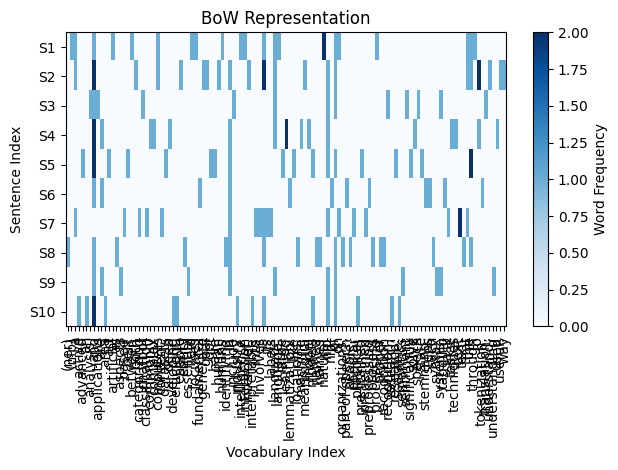

In [9]:
plt.imshow(bow_matrix, cmap='Blues', aspect='auto')
plt.title("BoW Representation")
plt.xlabel("Vocabulary Index")
plt.ylabel("Sentence Index")
plt.colorbar(label='Word Frequency')
plt.xticks(ticks=np.arange(len(vocab)), labels=vocab, rotation=90)
plt.yticks(ticks=np.arange(len(corpus)), labels=[f"S{i+1}" for i in range(len(corpus))])
plt.tight_layout()
plt.show()